In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 + 10

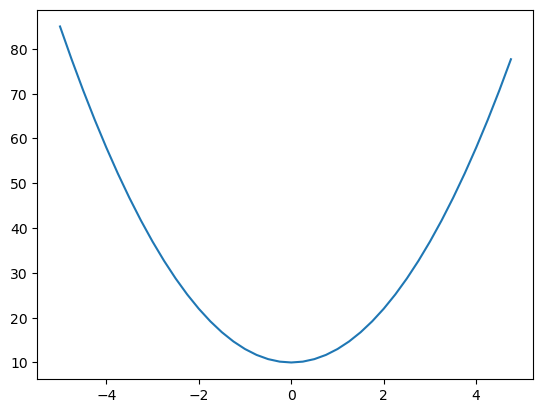

In [3]:
xs = np.arange(-5,5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [4]:
h = 0.0001

a = 0
d1 = f(a)

a1 = a+h
d2 = f(a1)

print(a)
print(a1)
print((d2-d1)/h)

0
0.0001
0.0003000000070585429


In [5]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = _children
        self._op = _op
        self.label = label
        self.grad = 0
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '-')
        return out
    

In [6]:
a = Value(5, label='a')
b = Value(2, label='b')
c = Value(4, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d

Value(data=14)

In [7]:
d._prev

(Value(data=10), Value(data=4))

In [8]:
e._op

'-'

In [9]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [10]:
draw_dot(d)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH